In [1]:
import pandas as pd
import numpy as np

In [2]:
match = pd.read_csv('match.csv')
delivery = pd.read_csv('delivery.csv')

In [3]:
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
match['method'].value_counts()

D/L    19
Name: method, dtype: int64

In [5]:
match.shape

(950, 20)

In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [7]:
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [8]:
total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [9]:
total_score_df.head()

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129


In [10]:
total_score_df = total_score_df[total_score_df['innings']==1]

In [11]:
total_score_df.head()

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [11]:
match_df = match.merge(total_score_df[['ID','total_run']],left_on='ID',right_on='ID')

In [12]:
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157


In [13]:
match_df['Team1'].value_counts()

Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Rising Pune Supergiant           7
Gujarat Titans                   7
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Name: Team1, dtype: int64

In [17]:
team = {'Royal Challengers Bangalore','Mumbai Indians','Chennai Super Kings','Kolkata Knight Riders','Rajasthan Royals',
        'Sunrisers Hyderabad','Delhi Capitals','Punjab Kings','Lucknow Super Giants','Gujarat Titans'}

In [18]:
len(team)

10

In [19]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team1'] = match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [20]:
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [21]:
match_df['Team1'].value_counts()

Royal Challengers Bangalore    126
Delhi Capitals                 114
Mumbai Indians                 112
Chennai Super Kings            111
Punjab Kings                   110
Sunrisers Hyderabad            108
Kolkata Knight Riders          105
Rajasthan Royals                89
Pune Warriors                   23
Gujarat Lions                   16
Lucknow Super Giants             8
Kochi Tuskers Kerala             7
Gujarat Titans                   7
Rising Pune Supergiants          7
Rising Pune Supergiant           7
Name: Team1, dtype: int64

In [22]:
match_df= match_df[match_df['Team1'].isin(team)]
match_df= match_df[match_df['Team2'].isin(team)]

In [34]:
match_df['Team2'].value_counts()

Mumbai Indians                 112
Sunrisers Hyderabad            109
Kolkata Knight Riders          106
Delhi Capitals                 101
Rajasthan Royals                99
Punjab Kings                    95
Chennai Super Kings             91
Royal Challengers Bangalore     91
Gujarat Titans                   9
Lucknow Super Giants             7
Name: Team2, dtype: int64

In [24]:
match_df.shape

(835, 21)

In [25]:
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157


In [26]:
match_df = match_df[match_df['method'].isna()]

In [27]:
match_df = match_df[['ID','City','Team1','Team2','WinningTeam','total_run']]

In [35]:
delivery_df = match_df.merge(delivery,on = 'ID')

In [36]:
delivery_df = delivery_df[delivery_df['innings']==2]

In [37]:
delivery_df.shape

(95083, 22)

In [38]:
delivery_df.head()

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,1,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,2,WP Saha,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,3,WP Saha,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,4,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,5,Shubman Gill,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


In [39]:
delivery_df['current_score']=delivery_df.groupby('ID').cumsum()['total_run_y']

In [40]:

delivery_df.head()

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1


In [41]:
delivery_df['runs_left'] = (delivery_df['total_run_x']+1) - delivery_df['current_score']

In [42]:
delivery_df.head()

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130


In [43]:
delivery_df['balls_left']=120 - (delivery_df['overs']*6 + delivery_df['ballnumber'])

In [44]:
delivery_df.head()

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,1,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,2,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,3,WP Saha,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,4,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,5,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115


In [45]:
wickets = delivery_df.groupby('ID').cumsum()['isWicketDelivery']

In [46]:
delivery_df['wickets_left'] = 10-wickets

In [47]:
delivery_df.head()

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,1,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,2,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,3,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,4,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,5,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10


In [48]:
delivery_df.tail()

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left
196449,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,222,2,14,5,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,143,31,1
196450,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,222,2,14,6,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,30,1
196451,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,222,2,14,7,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,29,1
196452,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,222,2,15,1,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,141,29,1
196453,335982,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,222,2,15,2,SB Joshi,...,0,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore,82,141,28,0


In [49]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [50]:
#rrr (runsleft*6)/ballsleft # to convert balls into over we have to divide it by 6, hence we muliply in numerator
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']  

In [51]:
delivery_df.sample(10)

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,crr,rrr
82215,981019,Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,208,2,12,5,V Kohli,...,V Kohli,bowled,NaN,Royal Challengers Bangalore,140,69,43,8,10.909091,9.627907
30766,1254064,Mumbai,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,147,2,6,1,DA Miller,...,NaN,NaN,NaN,Rajasthan Royals,26,122,83,7,4.216216,8.819277
40629,1216529,Abu Dhabi,Delhi Capitals,Mumbai Indians,Mumbai Indians,162,2,3,5,Q de Kock,...,NaN,NaN,NaN,Mumbai Indians,23,140,97,10,6.000000,8.659794
33006,1237178,Abu Dhabi,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,131,2,9,3,PK Garg,...,NaN,NaN,NaN,Sunrisers Hyderabad,56,76,63,7,5.894737,7.238095
87785,980925,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,138,2,16,1,YK Pathan,...,NaN,NaN,NaN,Kolkata Knight Riders,126,13,23,6,7.793814,3.391304
135968,548360,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,141,2,8,3,TM Dilshan,...,TM Dilshan,lbw,NaN,Royal Challengers Bangalore,48,94,69,9,5.647059,8.173913
94471,829781,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,167,2,15,5,KV Sharma,...,NaN,NaN,NaN,Sunrisers Hyderabad,91,77,25,3,5.747368,18.480000
128418,598012,Chennai,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,165,2,0,1,MEK Hussey,...,NaN,NaN,NaN,Chennai Super Kings,1,165,119,10,6.000000,8.319328
100527,829725,Pune,Punjab Kings,Delhi Capitals,Delhi Daredevils,165,2,15,3,Yuvraj Singh,...,NaN,NaN,NaN,Delhi Daredevils,127,39,27,8,8.193548,8.666667
108443,734003,Ranchi,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,148,2,6,2,DR Smith,...,NaN,NaN,NaN,Chennai Super Kings,49,100,82,8,7.736842,7.317073


In [52]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [53]:
delivery_df['result'] = delivery_df.apply(result,axis = 1)


In [54]:
delivery_df.head(1)

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,130,2,0,1,WP Saha,...,NaN,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1


In [55]:
final_df = delivery_df[['Team1','BattingTeam','City','runs_left','balls_left','wickets_left','total_run_x','crr','rrr','result']]


In [56]:
final_df.head()

,Team1,BattingTeam,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr,result
120,Rajasthan Royals,Gujarat Titans,Ahmedabad,131,119,10,130,0.0,6.605042,1
121,Rajasthan Royals,Gujarat Titans,Ahmedabad,131,118,10,130,0.0,6.661017,1
122,Rajasthan Royals,Gujarat Titans,Ahmedabad,130,117,10,130,2.0,6.666667,1
123,Rajasthan Royals,Gujarat Titans,Ahmedabad,130,116,10,130,1.5,6.724138,1
124,Rajasthan Royals,Gujarat Titans,Ahmedabad,130,115,10,130,1.2,6.782609,1


In [57]:
final_df.columns = ['bowling_team','batting_team','city','runs_left','balls_left','wickets_left','total_run_x','crr','rrr','result']

In [58]:
final_df.head()

,bowling_team,batting_team,city,runs_left,balls_left,wickets_left,total_run_x,crr,rrr,result
120,Rajasthan Royals,Gujarat Titans,Ahmedabad,131,119,10,130,0.0,6.605042,1
121,Rajasthan Royals,Gujarat Titans,Ahmedabad,131,118,10,130,0.0,6.661017,1
122,Rajasthan Royals,Gujarat Titans,Ahmedabad,130,117,10,130,2.0,6.666667,1
123,Rajasthan Royals,Gujarat Titans,Ahmedabad,130,116,10,130,1.5,6.724138,1
124,Rajasthan Royals,Gujarat Titans,Ahmedabad,130,115,10,130,1.2,6.782609,1


In [59]:
final_df = final_df.sample(final_df.shape[0])

In [60]:
final_df.sample()

,bowling_team,batting_team,city,runs_left,balls_left,wickets_left,total_run_x,crr,rrr,result
7125,Lucknow Super Giants,Delhi Capitals,Mumbai,187,110,9,195,5.4,10.2,0


In [61]:
final_df.shape

(95083, 10)

In [62]:
final_df.isnull().sum()

bowling_team       0
batting_team       0
city            6012
runs_left          0
balls_left         0
wickets_left       0
total_run_x        0
crr                0
rrr               11
result             0
dtype: int64

In [63]:
final_df.dropna(inplace = True)

In [64]:
final_df = final_df[final_df['balls_left']!=0]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
final_df.isnull().sum()

bowling_team    0
batting_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total_run_x     0
crr             0
rrr             0
result          0
dtype: int64

In [67]:
x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [68]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [69]:
x_train

,bowling_team,batting_team,city,runs_left,balls_left,wickets_left,total_run_x,crr,rrr
79577,Delhi Capitals,Kolkata Knight Riders,Delhi,9,7,5,168,8.495575,7.714286
99216,Royal Challengers Bangalore,Royal Challengers Bangalore,Bangalore,206,112,10,209,3.000000,11.035714
104830,Mumbai Indians,Delhi Daredevils,Mumbai,50,19,7,173,7.366337,15.789474
181770,Kolkata Knight Riders,Kolkata Knight Riders,Cape Town,126,95,9,150,6.000000,7.957895
137386,Chennai Super Kings,Deccan Chargers,Chennai,152,112,10,160,6.750000,8.142857
...,...,...,...,...,...,...,...,...,...
58201,Punjab Kings,Delhi Capitals,Chandigarh,95,70,8,166,8.640000,8.142857
97339,Chennai Super Kings,Kings XI Punjab,Chennai,120,40,3,192,5.475000,18.000000
89127,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,170,81,9,227,8.923077,12.592593
119657,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,70,45,9,174,8.400000,9.333333


In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [71]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse = False,drop='first'),['bowling_team','batting_team','city'])
], remainder='passthrough')

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [73]:
pipe1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [74]:
pipe2 = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [75]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['bowling_team',
                                                   'batting_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [76]:
y_pred = pipe1.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test,y_pred)

0.8130562126844655

In [79]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['bowling_team',
                                                   'batting_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [80]:
y_pred = pipe2.predict(x_test)

In [81]:
accuracy_score(y_test,y_pred)

0.997578010589163

In [73]:
pipe2.predict(x_test)[2]

0

In [74]:
x_train.head(1)

,bowling_team,batting_team,city,runs_left,balls_left,wickets_left,total_run_x,crr,rrr
120781,Rajasthan Royals,Rajasthan Royals,Jaipur,75,54,9,144,6.363636,8.333333


In [82]:
delivery_df = delivery_df[['ID','City','Team1','Team2','total_run_x','ballnumber','runs_left','balls_left','wickets_left','crr','rrr','result']]

In [83]:
delivery_df.columns = ['ID','city','bowling_team','batting_team','total_run_x','ballnumber','runs_left','balls_left','wickets_left','crr','rrr','result']

In [84]:
delivery_df.sample(10)

,ID,city,bowling_team,batting_team,total_run_x,ballnumber,runs_left,balls_left,wickets_left,crr,rrr,result
132088,548378,Pune,Delhi Capitals,Kolkata Knight Riders,162,5,138,103,8,8.823529,8.038835,0
123156,598040,Raipur,Delhi Capitals,Kolkata Knight Riders,136,5,105,91,8,6.620690,6.923077,1
152342,501221,Mumbai,Mumbai Indians,Chennai Super Kings,164,5,34,19,5,7.782178,10.736842,0
126241,598023,Bangalore,Royal Challengers Bangalore,Rajasthan Royals,117,1,118,119,10,0.000000,5.949580,1
142010,548324,Bangalore,Royal Challengers Bangalore,Rajasthan Royals,195,5,134,73,8,7.914894,11.013699,0
22882,1254100,Dubai,Rajasthan Royals,Sunrisers Hyderabad,164,2,51,46,8,9.243243,6.652174,1
125410,598029,Kolkata,Kolkata Knight Riders,Mumbai Indians,159,1,16,11,6,7.926606,8.727273,1
66223,1136600,Jaipur,Rajasthan Royals,Punjab Kings,158,3,30,3,3,6.615385,60.000000,0
17181,1304050,Mumbai,Lucknow Super Giants,Gujarat Titans,158,3,2,3,5,8.051282,4.000000,1
27406,1254078,Ahmedabad,Punjab Kings,Kolkata Knight Riders,123,4,50,62,7,7.655172,4.838710,1


# Analyzing our model

In [351]:
def match_progression(x_df,match_id,pipe1,pipe2):
    match = x_df[x_df['ID'] == match_id]
    match = match[(match['ballnumber'] == 6)]
    temp_df = match[['bowling_team','batting_team','city','runs_left','balls_left','wickets_left','total_run_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe1.predict_proba(temp_df)
    finalResult = pipe2.predict(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_run_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target,finalResult
    

In [358]:
temp_df,target,result = match_progression(delivery_df,1178405,pipe1,pipe2)
print('Winner = ',result[0])
temp_df

Target- 155
Winner =  0


,end_of_over,runs_after_over,wickets_in_over,lose,win
50423,1,2,0,30.4,69.6
50429,2,10,0,22.8,77.2
50435,3,10,0,17.5,82.5
50441,4,7,0,16.0,84.0
50447,5,5,0,16.4,83.6
50454,6,5,0,16.8,83.2
50460,7,8,0,14.5,85.5
50466,8,3,0,16.6,83.4
50472,9,15,0,9.4,90.6
50478,10,6,1,15.5,84.5


Text(0.5, 1.0, 'Target-155')

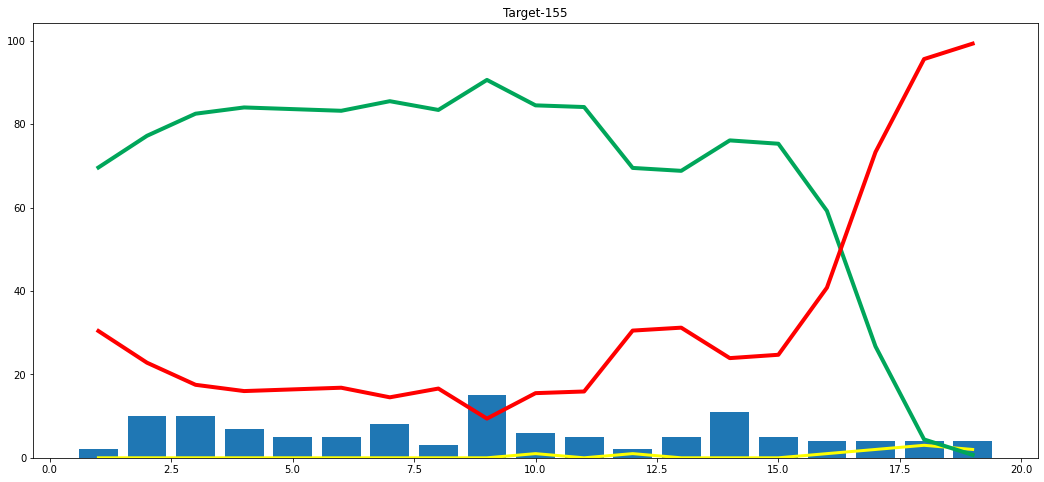

In [359]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

# Exporting models and data

In [361]:
team

{'Chennai Super Kings',
 'Delhi Capitals',
 'Gujarat Titan',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Punjab Kings',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad'}

In [362]:
delivery_df['city'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Raipur', 'Ranchi', 'Cuttack', 'Dharamsala', 'Nagpur',
       'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein',
       'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town'],
      dtype=object)

In [85]:
import pickle

In [86]:
pickle.dump(pipe1,open('lrModel.pkl','wb'))
pickle.dump(pipe2,open('rfModel.pkl','wb'))